In [1]:
import pandas as pd

# 1. Провести эксплоративный анализ данных для обучения

In [2]:
df = pd.read_csv('dataset_intent_detection.csv')

In [3]:
df.columns = ['intent', 'snippet']

In [4]:
df.head()

,intent,snippet
0,Positive-reaction,- а я о чем и говорю
1,Positive-reaction,- бомба
2,Positive-reaction,- вай-вай
3,Positive-reaction,- вау
4,Positive-reaction,- великолепный результат


In [5]:
df.shape

(2089, 2)

## Доля классов

In [6]:
df.intent.value_counts(normalize=True) * 100

Small_talk_food                        6.223073
Another_joke                           5.265677
Whoops                                 5.026328
Smalltalk_answer                       4.834849
Small_talk_boss                        4.356151
Small_talk_fired                       3.973193
Small_talk_you_are_right               3.877453
Sick_of_listeting                      3.446625
Small_talk_creators                    3.350886
Messing_up                             2.776448
Small_talk_relationships               2.680708
Sorry                                  2.489229
Small_talk_danger                      2.345620
Small_talk_haha                        2.249880
Bad_joke                               2.202011
Hello                                  2.106271
Small_talk_what-what                   2.058401
Tell_joke                              2.010531
Small_talk_ugly                        1.962662
Compliment                             1.962662
Finish                                 1

In [7]:
df.intent.value_counts()

Small_talk_food                        130
Another_joke                           110
Whoops                                 105
Smalltalk_answer                       101
Small_talk_boss                         91
Small_talk_fired                        83
Small_talk_you_are_right                81
Sick_of_listeting                       72
Small_talk_creators                     70
Messing_up                              58
Small_talk_relationships                56
Sorry                                   52
Small_talk_danger                       49
Small_talk_haha                         47
Bad_joke                                46
Hello                                   44
Small_talk_what-what                    43
Tell_joke                               42
Small_talk_ugly                         41
Compliment                              41
Finish                                  40
Small_talk_boring                       39
Small_talk_user_angry                   36
Small_talk_

## Оценить длину фразы

In [8]:
df.snippet

0                     - а я о чем и говорю
1                                  - бомба
2                                - вай-вай
3                                    - вау
4                 - великолепный результат
                       ...                
2084                - чудесно увидеть тебя
2085    - это чудо видеть тебя здесь снова
2086             - хорошо что ты снова тут
2087                 - приятно видеть тебя
2088     - приятно снова видеть тебя здесь
Name: snippet, Length: 2089, dtype: object

In [9]:
snippets = [word for word in df.snippet]
snippets.sort(key=len, reverse=True)

In [10]:
snippets = [snippet + ' (Длина:' + str(len(snippet)) + ')' for snippet in snippets]

In [11]:
snippets[:10]

['- можешь приступать к поиску новой работы так как ты тут больше не работаешь (Длина:76)',
 '- если собираешься рассказывать шутки - рассказывай их правильно (Длина:64)',
 '- можешь приступать к поиску новой работы потому что ты уволена (Длина:63)',
 '- это было восхитительно благодаря тому что ты меня рассмешил (Длина:61)',
 '- Я никогда не видел такого отвратительного человека, как ты. (Длина:61)',
 '- ты сейчас состоишь с кем-то в романтических отношениях? (Длина:57)',
 '- можешь приступать к поиску новой работы. Ты уволена! (Длина:54)',
 '- тебе пора искать другую работу потому что ты уволена (Длина:54)',
 '- какое у тебя мнение насчет искуственного интеллекта? (Длина:54)',
 '- придется подыскать другую работу потому что уволена (Длина:53)']

## Частотный анализ слов для каждого класса

In [12]:
import string
from nltk import word_tokenize, Text, download
from nltk.probability import FreqDist
from nltk.corpus import stopwords
download('punkt')
download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
df

,intent,snippet
0,Positive-reaction,- а я о чем и говорю
1,Positive-reaction,- бомба
2,Positive-reaction,- вай-вай
3,Positive-reaction,- вау
4,Positive-reaction,- великолепный результат
...,...,...
2084,smalltalk_greetings_nice_to_see_you,- чудесно увидеть тебя
2085,smalltalk_greetings_nice_to_see_you,- это чудо видеть тебя здесь снова
2086,smalltalk_greetings_nice_to_see_you,- хорошо что ты снова тут
2087,smalltalk_greetings_nice_to_see_you,- приятно видеть тебя


In [14]:
words_for_class = dict()

In [15]:
intents = pd.unique(df.intent)
for intent in intents:
    text_in_intent = [x for x in df.snippet[df.intent == intent]]
    
    text = ''
    for word in text_in_intent:
        text += word
        
    text = text.lower()
    text = "".join([ch for ch in text if ch not in string.punctuation])
    text_tokens = word_tokenize(text)
    text = Text(text_tokens)
    fdist = FreqDist(text)
    
    russian_stopwords = stopwords.words("russian")
    for word in russian_stopwords:
        if word in fdist.keys():
            fdist.pop(word)
    
    words_for_class[intent] = fdist

In [16]:
words_for_class

{'Positive-reaction': FreqDist({'бомба': 2, 'воу': 2, 'говорю': 1, 'вайвай': 1, 'вау': 1, 'великолепный': 1, 'результат': 1, 'верно': 1, 'это': 1, 'понимаю': 1, ...}),
 'Negative_reaction': FreqDist({'отсюда': 4, 'нравится': 2, 'умеешь': 2, 'искать': 2, 'бред': 1, 'согласна': 1, 'согласен': 1, 'протестую': 1, 'вали': 1, 'вон': 1, ...}),
 'Hello': FreqDist({'утро': 6, 'бот': 5, 'вечера': 4, 'доброго': 4, 'желаю': 3, 'алоха': 2, 'привет': 2, 'тебе': 2, 'йо': 2, 'чувак': 2, ...}),
 'Finish': FreqDist({'давай': 4, 'позже': 4, 'пока': 3, 'конец': 2, 'хочу': 2, 'общаться': 2, 'чувак': 2, 'честь': 2, 'имею': 2, 'адиос': 1, ...}),
 'Smalltalk_answer': FreqDist({'почему': 4, 'ладно': 3, 'говори': 3, 'хочу': 3, 'очень': 3, 'точнее': 3, 'это': 2, 'тебе': 2, 'верю': 2, 'нравится': 2, ...}),
 'AreYouHere': FreqDist({'ау': 2, 'работаешь': 1}),
 'Tell_about_you': FreqDist({'твоя': 4, 'биография': 2, 'история': 2, 'семейная': 1, 'родословная': 1, 'такое': 1, 'рассказ': 1, 'жизни': 1, 'интро': 1, 'вооб

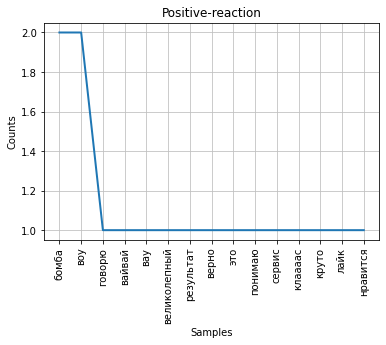

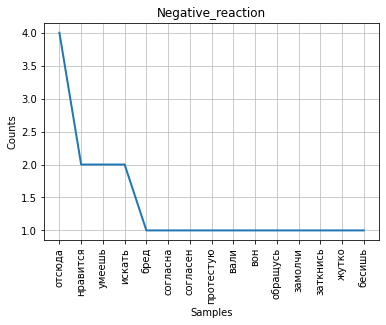

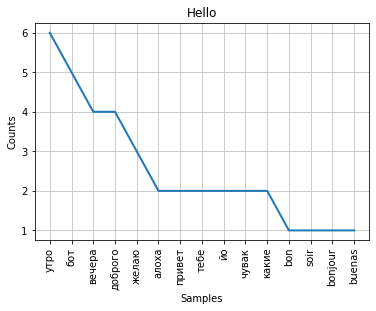

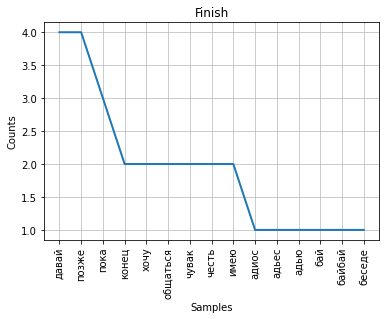

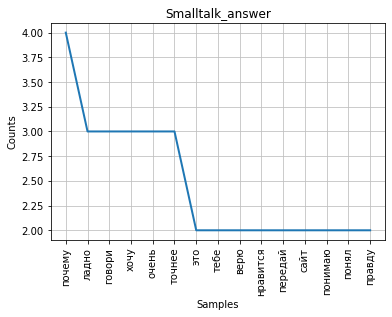

In [17]:
for intent in intents[:5]:
    words_for_class[intent].plot(15,cumulative=False, title=intent)

# 2. Разработать свою модель для решения задачи

## SVM with spacy

In [18]:
import spacy
import numpy as np
import string
import pickle

In [19]:
!python -m spacy download ru_core_news_lg

2022-09-12 08:04:19.583845: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 513.4 MB 14 kB/s 
     |████████████████████████████████| 55 kB 3.2 MB/s 
     |████████████████████████████████| 8.2 MB 15.7 MB/s 
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=891b717008af9393d8002f106a63ff82373eeb749263e080c1708293c105a3b4
  Stored in directory: /root/.cache/pip/wheels/72/b0/3f/1d95f96ff986c7dfffe46ce2be4062f38ebd04b506c77c81b9
Successfully built docopt
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_lg')


In [20]:
nlp = spacy.load('ru_core_news_lg')

In [21]:
#train_data = df.snippet.values.tolist()
train_labels = df.intent.values.tolist()

In [22]:
train_data = []
for word in df.snippet.values.tolist():
    word = word.lower()
    word = "".join([ch for ch in word if ch not in string.punctuation])
    word = word[1:]
    train_data.append(word)

In [23]:
def encode_sentences(sentences):
    n_sentences = len(sentences)
    X = np.zeros((n_sentences, nlp.vocab.vectors_length))

    for idx, sentence in enumerate(sentences):
        doc = nlp(sentence)
        X[idx, :] = doc.vector
    return X

train_X = encode_sentences(train_data)

In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

labels_train = le.fit_transform(train_labels)

In [25]:
%%time
from sklearn.svm import SVC
clf = SVC(C=1, kernel='linear', probability=True)
clf.fit(train_X, labels_train)

CPU times: user 2.54 s, sys: 2.35 ms, total: 2.54 s
Wall time: 2.54 s


SVC(C=1, kernel='linear', probability=True)

In [43]:
from sklearn.metrics import classification_report
y_true, y_pred = labels_train, clf.predict(train_X)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00         5
           2       0.98      0.93      0.96        46
           3       1.00      0.90      0.95        41
           4       1.00      0.85      0.92        13
           5       1.00      0.90      0.95        40
           6       1.00      0.93      0.96        44
           7       1.00      1.00      1.00        19
           8       0.98      1.00      0.99        58
           9       1.00      1.00      1.00        21
          10       0.92      0.79      0.85        29
          11       1.00      0.65      0.79        26
          12       1.00      1.00      1.00        11
          13       0.99      1.00      0.99        72
          14       1.00      1.00      1.00        30
          15       0.88      1.00      0.93        14
          16       1.00      1.00      1.00        16
          17       0.97    

In [27]:
v = encode_sentences(['привет'])

In [28]:
%%time
list_of_prob = clf.predict_proba(v).tolist()[0]

list_of_prob.sort(reverse=True)
top_3_index = list_of_prob[:3]
top_3_scores = [clf.predict_proba(v).tolist()[0].index(i) for i in top_3_index]
intents = le.inverse_transform(clf.classes_)[top_3_scores]

intents.tolist(), top_3_index

CPU times: user 6.7 ms, sys: 38 µs, total: 6.74 ms
Wall time: 7.44 ms


(['Hello', 'Thank_you', 'smalltalk_greetings_nice_to_see_you'],
 [0.5756852734932107, 0.12016889578481502, 0.027937761946051354])

In [29]:
intents = le.inverse_transform(clf.classes_).tolist()
intents

['Another_joke',
 'AreYouHere',
 'Bad_joke',
 'Compliment',
 'Dont_understand',
 'Finish',
 'Hello',
 'I_can_help',
 'Messing_up',
 'Name',
 'Negative_reaction',
 'Positive-reaction',
 'Question',
 'Sick_of_listeting',
 'Small_talk_age',
 'Small_talk_bad_mood',
 'Small_talk_be_clever',
 'Small_talk_boring',
 'Small_talk_boss',
 'Small_talk_busy',
 'Small_talk_chatbot',
 'Small_talk_creators',
 'Small_talk_danger',
 'Small_talk_film',
 'Small_talk_fired',
 'Small_talk_food',
 'Small_talk_good_mood',
 'Small_talk_haha',
 'Small_talk_hobby',
 'Small_talk_hungry',
 'Small_talk_joke',
 'Small_talk_lets_talk',
 'Small_talk_life',
 'Small_talk_love',
 'Small_talk_music',
 'Small_talk_relationships',
 'Small_talk_residence',
 'Small_talk_technology',
 'Small_talk_ugly',
 'Small_talk_user_angry',
 'Small_talk_user_sad',
 'Small_talk_what-what',
 'Small_talk_work',
 'Small_talk_you_are_right',
 'Small_talkt_wait',
 'Smalltalk_answer',
 'Sorry',
 'Tell_about_you',
 'Tell_joke',
 'Thank_you',
 'Wh

In [30]:
# filename = 'SVC.sav'
# pickle.dump(clf, open(filename, 'wb'))

In [31]:
# model = pickle.load(open(filename, 'rb'))

In [32]:
# list_of_prob = model.predict_proba(v).tolist()[0]
# list_of_prob.sort(reverse=True)
# top_3_index = list_of_prob[:3]
# top_3_scores = [model.predict_proba(v).tolist()[0].index(i) for i in top_3_index]

In [33]:
# intents = le.inverse_transform(clf.classes_)[top_3_scores]

In [34]:
# intents.tolist(), top_3_index

In [35]:
# with open('intents.txt', 'w') as file:
#   for intent in intents:
#     file.write(intent + "\n")

Метрики: classification_report

Время обучения: CPU times: user 3.54 s, sys: 16 ms, total: 3.56 s Wall time: 5.24 s

Скорость вывода модели: CPU times: user 6.3 ms, sys: 0 ns, total: 6.3 ms
Wall time: 10.1 ms для фразы 'привет'

Объём памяти, необходимый для обучения: -

Объём памяти вывода модели: -

Объём памяти для хранения модели: 4,99 МБ (5 237 605 байт)
